# Covid-19 Virus Spreading Forecasts in the U.S 

**Authors:** Tina Teng, Truong Le

### Table of Contents

- <a href='#I'> I. Question Framing </a>


- <a href='#II1'> II. Part 1: Exploratory Data Analysis (EDA) </a>

    - <a href='#IIA'> A: Data Heads </a>

    - <a href='#IIB'> B. Data Shapes </a>

    - <a href='#IIC'> C: Data Info </a>

    - <a href='#IID'> D: Data Desciption </a>

    - <a href='#IIE'> C: NaN Values </a>


- <a href='#II2'>  II. Part 2: Data Cleaning </a>


- <a href='#III'>  III. Data Visualization </a>
    - <a href='#3a'>  3a. Comparing The Total Of Confirmed v.s Death Cases In The U.S </a>
    - <a href='#3b'>  3b. Comparing The Total Of Confirmed Cases vs Tested-Cases In The U.S </a>
    - <a href='#3c'>  3c. Geographical Comparisons of Mortality and Hospitalization Rates in the U.S </a>
    - <a href='#3d'>  3d. Correlations between features in all states in the U.S </a>
    - <a href='#3e'>  3e. Coronavirus Growth in New York </a>


- <a href='#IV'> IV. Method and Experiments </a>

    - <a href='#Exp1'> Experiment 1: Linear Regression using Exponential Growth to predict the growth in the future </a>
    - <a href='#Exp2'> Experiment 2: Predicting the future death of the U.S using Linear Regression Model with high accuracy </a>
    - <a href='#Exp3'> Experiment 3: SIR Model to predict the future trends </a>





<br/><br/>
<a id='I'></a>

## I. Question Framing:
**Q1:** How can we track the spread of virus through our understanding of the data, social networks, and human behavior?


**Q2:** How to predict the spread and death rates of COVID-19 in the near future based on the data we have? What models we've learned recently will be the most effective ones to predict the spread?

<br/><br/>
<a id='II1'></a>

## II. Part 1: Exploratory Data Analysis (EDA):


**We will use several EDA functions, including read_csv, head(), shape, info(), describe, value_counts() to conduct preliminary EDA and get a glimpse of how our data look like.**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

!pip install folium
import folium
from sklearn.linear_model import LinearRegression

In [2]:
states_data = pd.read_csv("4.18states.csv")
counties_data = pd.read_csv("abridged_couties.csv")
deaths_data = pd.read_csv("time_series_covid19_deaths_US.csv")
confirmed_data = pd.read_csv("time_series_covid19_confirmed_US.csv")

-------

<a id='IIA'></a>
### A. Data Heads:

In [3]:
states_data.head(5)

Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2020-04-18 22:32:47  32.3182  -86.9023   
1          Alaska             US  2020-04-18 22:32:47  61.3707 -152.4044   
2  American Samoa             US                  NaN -14.2710 -170.1320   
3         Arizona             US  2020-04-18 22:32:47  33.7298 -111.4312   
4        Arkansas             US  2020-04-18 22:32:47  34.9697  -92.3731   

   Confirmed  Deaths  Recovered  Active  FIPS  Incident_Rate  People_Tested  \
0       4712     153        NaN  4559.0   1.0     100.492717        42538.0   
1        314       9      147.0   305.0   2.0      52.530410         9655.0   
2          0       0        NaN     NaN  60.0       0.000000            3.0   
3       4724     180      539.0  4544.0   4.0      64.901548        51045.0   
4       1744      38      703.0  1706.0   5.0      67.361213        24141.0   

   People_Hospitalized  Mortality_Rate       UID ISO3  Testing_Rate  \
0                620.0        3.247029  84000001  USA    907.206961   
1                 39.0        2.866242  84000002  USA   1615.226458   
2                  NaN             NaN        16  ASM      5.391708   
3                566.0        3.810330  84000004  USA    701.291175   
4                291.0        2.178899  84000005  USA    932.435235   

   Hospitalization_Rate  
0             13.157895  
1             12.420382  
2                   NaN  
3             11.981372  
4             16.685780

In [4]:
counties_data.head(5)

countyFIPS  STATEFP  COUNTYFP CountyName StateName    State        lat  \
0      01001      1.0       1.0    Autauga        AL  Alabama  32.540091   
1      01003      1.0       3.0    Baldwin        AL  Alabama  30.738314   
2      01005      1.0       5.0    Barbour        AL  Alabama  31.874030   
3      01007      1.0       7.0       Bibb        AL  Alabama  32.999024   
4      01009      1.0       9.0     Blount        AL  Alabama  33.990440   

         lon  POP_LATITUDE  POP_LONGITUDE  ... >500 gatherings public schools  \
0 -86.645649     32.500389     -86.494165  ...        737497.0       737500.0   
1 -87.726272     30.548923     -87.762381  ...        737497.0       737500.0   
2 -85.397327     31.844036     -85.310038  ...        737497.0       737500.0   
3 -87.125260     33.030921     -87.127659  ...        737497.0       737500.0   
4 -86.562711     33.955243     -86.591491  ...        737497.0       737500.0   

   restaurant dine-in  entertainment/gym  federal guidelines  \
0            737503.0           737512.0            737500.0   
1            737503.0           737512.0            737500.0   
2            737503.0           737512.0            737500.0   
3            737503.0           737512.0            737500.0   
4            737503.0           737512.0            737500.0   

   foreign travel ban  SVIPercentile  HPSAShortage  HPSAServedPop  \
0            737495.0         0.4354           NaN            NaN   
1            737495.0         0.2162           NaN            NaN   
2            737495.0         0.9959          6.08         5400.0   
3            737495.0         0.6003          2.75        14980.0   
4            737495.0         0.4242          7.21        31850.0   

   HPSAUnderservedPop  
0                 NaN  
1                 NaN  
2             18241.0  
3              6120.0  
4             25233.0  

[5 rows x 87 columns]

In [5]:
deaths_data.head(5)

UID iso2 iso3  code3  FIPS Admin2            Province_State Country_Region  \
0   16   AS  ASM     16  60.0    NaN            American Samoa             US   
1  316   GU  GUM    316  66.0    NaN                      Guam             US   
2  580   MP  MNP    580  69.0    NaN  Northern Mariana Islands             US   
3  630   PR  PRI    630  72.0    NaN               Puerto Rico             US   
4  850   VI  VIR    850  78.0    NaN            Virgin Islands             US   

       Lat     Long_  ... 4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  \
0 -14.2710 -170.1320  ...      0        0        0        0        0        0   
1  13.4443  144.7937  ...      4        4        5        5        5        5   
2  15.0979  145.6739  ...      2        2        2        2        2        2   
3  18.2208  -66.5901  ...     33       39       42       44       45       45   
4  18.3358  -64.8963  ...      1        1        1        1        1        1   

   4/15/20  4/16/20  4/17/20  4/18/20  
0        0        0        0        0  
1        5        5        5        5  
2        2        2        2        2  
3       51       56       58       60  
4        1        1        2        3  

[5 rows x 100 columns]

In [6]:
confirmed_data.head(5)

UID iso2 iso3  code3  FIPS Admin2            Province_State Country_Region  \
0   16   AS  ASM     16  60.0    NaN            American Samoa             US   
1  316   GU  GUM    316  66.0    NaN                      Guam             US   
2  580   MP  MNP    580  69.0    NaN  Northern Mariana Islands             US   
3  630   PR  PRI    630  72.0    NaN               Puerto Rico             US   
4  850   VI  VIR    850  78.0    NaN            Virgin Islands             US   

       Lat     Long_  ... 4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  \
0 -14.2710 -170.1320  ...      0        0        0        0        0        0   
1  13.4443  144.7937  ...    128      130      133      133      133      133   
2  15.0979  145.6739  ...     11       11       11       11       11       11   
3  18.2208  -66.5901  ...    683      725      788      897      903      923   
4  18.3358  -64.8963  ...     45       50       51       51       51       51   

   4/15/20  4/16/20  4/17/20  4/18/20  
0        0        0        0        0  
1      135      135      136      136  
2       13       13       13       14  
3      974     1043     1068     1118  
4       51       51       51       53  

[5 rows x 99 columns]

-------

<a id='IIB'></a>
### B. Data Shapes:

In [7]:
states_data.shape

(140, 18)

In [8]:
counties_data.shape

(3244, 87)

In [9]:
deaths_data.shape

(3255, 100)

In [10]:
confirmed_data.shape

(3255, 99)

-------

<a id='IIC'></a>
### C. Data Info: 

We are checking how many null values we have for each column by using df.info

*Note: The following code is commented out for ease of scrolling.*

In [11]:
states_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 18 columns):
Province_State          140 non-null object
Country_Region          140 non-null object
Last_Update             57 non-null object
Lat                     135 non-null float64
Long_                   135 non-null float64
Confirmed               140 non-null int64
Deaths                  140 non-null int64
Recovered               116 non-null float64
Active                  139 non-null float64
FIPS                    58 non-null float64
Incident_Rate           135 non-null float64
People_Tested           56 non-null float64
People_Hospitalized     49 non-null float64
Mortality_Rate          137 non-null float64
UID                     140 non-null int64
ISO3                    140 non-null object
Testing_Rate            56 non-null float64
Hospitalization_Rate    49 non-null float64
dtypes: float64(11), int64(3), object(4)
memory usage: 19.8+ KB


In [12]:
#counties_data.info()

In [13]:
#deaths_data.info()

In [14]:
#confirmed_data.info()

-------

<a id='IID'></a>
### D. Data Desciption:

In [15]:
states_data.describe()

Lat       Long_      Confirmed        Deaths     Recovered  \
count  135.000000  135.000000     140.000000    140.000000    116.000000   
mean    29.455453  -15.673438    6139.542857    320.250000   1812.077586   
std     23.261026   99.481085   22929.735949   1592.629354   8659.321623   
min    -51.796300 -170.132000       0.000000      0.000000      0.000000   
25%     21.930350  -89.301300     102.750000      1.000000     11.000000   
50%     35.747800  -66.461900     567.500000      7.000000    167.500000   
75%     42.493100  108.829100    2588.000000     86.500000    565.750000   
max     71.706900  165.618042  241712.000000  17671.000000  64840.000000   

              Active          FIPS  Incident_Rate  People_Tested  \
count     139.000000     58.000000     135.000000      56.000000   
mean     4718.633094   3288.086207     102.594828   65901.464286   
std     21756.311994  17408.350591     177.067175   93223.246577   
min    -64840.000000      1.000000       0.000000       3.000000   
25%        10.500000     18.250000       9.833124   13932.000000   
50%       131.000000     32.500000      49.293681   38174.000000   
75%      2455.000000     47.750000     101.813588   74708.750000   
max    224041.000000  99999.000000    1433.554603  596532.000000   

       People_Hospitalized  Mortality_Rate           UID  Testing_Rate  \
count            49.000000      137.000000  1.400000e+02     56.000000   
mean           2327.122449        2.525337  3.240692e+07   1236.373208   
std            7752.749565        2.527183  4.103329e+07    691.938155   
min               6.000000        0.000000  1.600000e+01      5.391708   
25%             193.000000        0.506650  3.603750e+03    769.980054   
50%             561.000000        1.976285  1.561550e+04   1025.328233   
75%            1761.000000        3.888889  8.400002e+07   1561.241814   
max           54339.000000       14.285714  8.410000e+07   3537.934378   

       Hospitalization_Rate  
count             49.000000  
mean              14.141068  
std                6.912858  
min                4.398777  
25%                8.825847  
50%               12.910798  
75%               18.267420  
max               37.236793

In [16]:
counties_data.describe()

STATEFP     COUNTYFP          lat          lon  POP_LATITUDE  \
count  3221.000000  3221.000000  3075.000000  3075.000000   3221.000000   
mean     31.296802   103.088171    38.288841   -91.806071     37.961062   
std      16.278384   106.960309     4.859845    11.458805      6.088342   
min       1.000000     1.000000    25.533934  -124.135448     17.981258   
25%      19.000000    35.000000    34.634938   -98.091395     34.336743   
50%      30.000000    79.000000    38.367768   -90.403866     38.233745   
75%      46.000000   133.000000    41.731250   -83.581064     41.690216   
max      72.000000   840.000000    48.820534   -67.645761     70.522779   

       POP_LONGITUDE  Rural-UrbanContinuumCode2013  PopulationEstimate2018  \
count    3221.000000                   3220.000000            3.221000e+03   
mean      -91.659071                      4.936646            1.026650e+05   
std        13.405693                      2.724771            3.295844e+05   
min      -168.292885                      1.000000            8.800000e+01   
25%       -98.061108                      2.000000            1.113900e+04   
50%       -89.963901                      6.000000            2.609900e+04   
75%       -82.993084                      7.000000            6.711100e+04   
max       -65.301586                      9.000000            1.010552e+07   

       PopTotalMale2017  PopTotalFemale2017  ...  >500 gatherings  \
count      3.221000e+03        3.221000e+03  ...      3023.000000   
mean       5.034336e+04        5.191579e+04  ...    737503.856103   
std        1.617125e+05        1.674767e+05  ...         5.640698   
min        4.200000e+01        4.600000e+01  ...    737495.000000   
25%        5.590000e+03        5.511000e+03  ...    737499.000000   
50%        1.301000e+04        1.303400e+04  ...    737502.000000   
75%        3.348900e+04        3.394100e+04  ...    737509.000000   
max        5.009834e+06        5.153673e+06  ...    737517.000000   

       public schools  restaurant dine-in  entertainment/gym  \
count     3219.000000         3219.000000        3154.000000   
mean    737502.373408       737503.675986      737504.791693   
std          3.420188            4.252994           5.592975   
min     737499.000000       737496.000000      737496.000000   
25%     737500.000000       737501.000000      737501.000000   
50%     737501.000000       737503.000000      737503.000000   
75%     737503.000000       737505.000000      737507.000000   
max     737517.000000       737519.000000      737521.000000   

       federal guidelines  foreign travel ban  SVIPercentile  HPSAShortage  \
count              3219.0              3219.0    3140.000000   2103.000000   
mean             737500.0            737495.0       0.499836      4.180543   
std                   0.0                 0.0       0.288725      8.361827   
min              737500.0            737495.0       0.000000      0.000000   
25%              737500.0            737495.0       0.249700      0.770000   
50%              737500.0            737495.0       0.499850      1.840000   
75%              737500.0            737495.0       0.749775      3.815000   
max              737500.0            737495.0       1.000000     81.130000   

       HPSAServedPop  HPSAUnderservedPop  
count    2103.000000         2103.000000  
mean    10663.317641        12744.207323  
std     18959.579452        25192.923472  
min         0.000000            0.000000  
25%       750.000000         2380.500000  
50%      4500.000000         5750.000000  
75%     12780.000000        11519.000000  
max    204030.000000       243391.000000  

[8 rows x 81 columns]

In [17]:
deaths_data.describe()

UID        code3          FIPS          Lat        Long_  \
count  3.255000e+03  3255.000000   3251.000000  3255.000000  3255.000000   
mean   8.390311e+07   839.444547  32090.929560    37.160943   -89.119431   
std    3.291486e+06    18.085603  17825.153176     8.669492    21.545703   
min    1.600000e+01    16.000000     60.000000   -14.271000  -170.132000   
25%    8.401904e+07   840.000000  19038.000000    34.226884   -98.033466   
50%    8.403005e+07   840.000000  30045.000000    38.147175   -89.820922   
75%    8.404702e+07   840.000000  47010.000000    41.684126   -82.768385   
max    8.410000e+07   850.000000  99999.000000    69.314792   145.673900   

         Population  1/22/20  1/23/20  1/24/20  1/25/20  ...       4/9/20  \
count  3.255000e+03   3255.0   3255.0   3255.0   3255.0  ...  3255.000000   
mean   1.032930e+05      0.0      0.0      0.0      0.0  ...     5.082642   
std    3.456344e+05      0.0      0.0      0.0      0.0  ...    93.303430   
min    0.000000e+00      0.0      0.0      0.0      0.0  ...     0.000000   
25%    9.818000e+03      0.0      0.0      0.0      0.0  ...     0.000000   
50%    2.463300e+04      0.0      0.0      0.0      0.0  ...     0.000000   
75%    6.621750e+04      0.0      0.0      0.0      0.0  ...     1.000000   
max    1.003911e+07      0.0      0.0      0.0      0.0  ...  5150.000000   

           4/10/20      4/11/20      4/12/20      4/13/20      4/14/20  \
count  3255.000000  3255.000000  3255.000000  3255.000000  3255.000000   
mean      5.709985     6.286329     6.764670     7.228264     7.935791   
std     105.486528   115.444853   125.013917   133.287775   143.577900   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max    5820.000000  6367.000000  6898.000000  7349.000000  7905.000000   

           4/15/20       4/16/20       4/17/20       4/18/20  
count  3255.000000   3255.000000   3255.000000   3255.000000  
mean      8.701997     10.112442     11.297389     11.878341  
std     153.825947    205.914427    236.261958    237.195679  
min       0.000000      0.000000      0.000000      0.000000  
25%       0.000000      0.000000      0.000000      0.000000  
50%       0.000000      0.000000      0.000000      0.000000  
75%       1.000000      1.000000      1.000000      2.000000  
max    8455.000000  11477.000000  13202.000000  13202.000000  

[8 rows x 94 columns]

In [18]:
confirmed_data.describe()

UID        code3          FIPS          Lat        Long_  \
count  3.255000e+03  3255.000000   3251.000000  3255.000000  3255.000000   
mean   8.390311e+07   839.444547  32090.929560    37.160943   -89.119431   
std    3.291486e+06    18.085603  17825.153176     8.669492    21.545703   
min    1.600000e+01    16.000000     60.000000   -14.271000  -170.132000   
25%    8.401904e+07   840.000000  19038.000000    34.226884   -98.033466   
50%    8.403005e+07   840.000000  30045.000000    38.147175   -89.820922   
75%    8.404702e+07   840.000000  47010.000000    41.684126   -82.768385   
max    8.410000e+07   850.000000  99999.000000    69.314792   145.673900   

           1/22/20      1/23/20      1/24/20      1/25/20      1/26/20  ...  \
count  3255.000000  3255.000000  3255.000000  3255.000000  3255.000000  ...   
mean      0.000307     0.000307     0.000614     0.000614     0.001536  ...   
std       0.017528     0.017528     0.024784     0.024784     0.039169  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

             4/9/20       4/10/20       4/11/20        4/12/20        4/13/20  \
count   3255.000000   3255.000000   3255.000000    3255.000000    3255.000000   
mean     142.175115    152.545315    161.719201     170.603072     178.377573   
std     1708.728596   1817.480408   1925.872349    2020.379479    2092.537825   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%        1.000000      1.000000      1.000000       1.000000       1.000000   
50%        6.000000      6.000000      7.000000       7.000000       8.000000   
75%       27.000000     29.000000     31.000000      33.000000      36.000000   
max    87028.000000  92384.000000  98308.000000  103208.000000  106763.000000   

             4/14/20        4/15/20        4/16/20        4/17/20  \
count    3255.000000    3255.000000    3255.000000    3255.000000   
mean      186.688172     195.499232     205.161598     214.963441   
std      2168.739202    2310.630693    2407.808382    2492.146682   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       2.000000       2.000000   
50%         8.000000       8.000000       9.000000      10.000000   
75%        38.000000      40.000000      43.000000      45.500000   
max    110465.000000  118302.000000  123146.000000  127352.000000   

             4/18/20  
count    3255.000000  
mean      224.945315  
std      2638.789949  
min         0.000000  
25%         2.000000  
50%        10.000000  
75%        47.000000  
max    135572.000000  

[8 rows x 93 columns]

-------

<a id='IIE'></a>
### E. Check how many NaN values each data frame has:

In [19]:
deaths_data.isna().sum().sum()

11

In [20]:
confirmed_data.isna().sum().sum()

11

In [21]:
states_data.isna().sum()

Province_State           0
Country_Region           0
Last_Update             83
Lat                      5
Long_                    5
Confirmed                0
Deaths                   0
Recovered               24
Active                   1
FIPS                    82
Incident_Rate            5
People_Tested           84
People_Hospitalized     91
Mortality_Rate           3
UID                      0
ISO3                     0
Testing_Rate            84
Hospitalization_Rate    91
dtype: int64

In [22]:
counties_data.isna().sum()

countyFIPS               0
STATEFP                 23
COUNTYFP                23
CountyName               0
StateName                0
                      ... 
foreign travel ban      25
SVIPercentile          104
HPSAShortage          1141
HPSAServedPop         1141
HPSAUnderservedPop    1141
Length: 87, dtype: int64

In [23]:
states_data.Country_Region.unique()

array(['US', 'Canada', 'United Kingdom', 'China', 'Netherlands',
       'Australia', 'Denmark', 'France'], dtype=object)

<br/><br/><br/>

<a id='II2'></a>

## II. Part 2: Data Cleaning:


**As we can see from our EDA, there are a lot of NaN Values in our data frames. Thus, we will now try to apply some data cleaning strategies in order to make our data frames in an easy-to-model format**

1. There are many NaN values in our data frames, after careful considerations, we decided to fill these missing values with 0s. There are two reasons we think that this is the best choice to do: 

    - Firstly, we observed that the `confirmed_data` and `deaths_data` have only 11 missing values (in FIPS and Admin2). These values do not relate to any models or predictions we are going to use. Thus, we will drop these two columns.

    - Secondly, for unavailable data in `counties_data` and `states_data`, we will fill them with 0s and just use available data to compare our predictions with data from confirmed.csv and death.csv. In other words, we will not use these features in `states_data` to train our models because the NaN values may negatively impact our analysis in some mysterious ways.



2. In `counties_data`, we see that some rows have all 0.0s values, so we drop these rows. In this data frame, we also see that only 2 rows have all non-zeros values as shown above. Thus, we should not filter out anymore value since it will not help our modellings.



3. We can see from part 1.E above that `states_data` has more than 1 country, including: 'US', 'Canada', 'United Kingdom', 'China', 'Netherlands', 'Australia', 'Denmark', 'France'. Thus, we want to take into account only the U.S by filtering out all other countries. We also dropped some rows that do not directly relate to the states of the U.S, for example: Recovered row , Samoa 3th row, Diamond Princess 9th row, Grand Princess 13th row, Puerto Rico (Caribbean island and unincorporated U.S. territory). 

-------

### 1. Filter and Drop NaN values with 0, as explained above:

In [24]:
states_data.fillna(0, inplace=True)
counties_data.fillna(0, inplace=True)

In [25]:
deaths_data.drop(columns=['FIPS', 'Admin2'], inplace=True)
confirmed_data.drop(columns=['FIPS', 'Admin2'], inplace=True)

In [26]:
#Check if there is any NaN values.
deaths_data.isna().sum().sum()

0

In [27]:
#Check if there is any NaN values.
confirmed_data.isna().sum().sum()

0

-------


### 2. Drop rows that have all 0s in counties_data:

In [28]:
counties_data = counties_data[(counties_data['POP_LATITUDE'] != 0) & (counties_data['State'] !=0)]

In [29]:
counties_data[counties_data['HPSAShortage'] != 0]

countyFIPS  STATEFP  COUNTYFP  CountyName StateName    State        lat  \
2         01005      1.0       5.0     Barbour        AL  Alabama  31.874030   
3         01007      1.0       7.0        Bibb        AL  Alabama  32.999024   
4         01009      1.0       9.0      Blount        AL  Alabama  33.990440   
5         01011      1.0      11.0     Bullock        AL  Alabama  32.106336   
6         01013      1.0      13.0      Butler        AL  Alabama  31.757139   
...         ...      ...       ...         ...       ...      ...        ...   
3132      56027     56.0      27.0    Niobrara        WY  Wyoming  43.056613   
3134      56031     56.0      31.0      Platte        WY  Wyoming  42.132501   
3136      56035     56.0      35.0    Sublette        WY  Wyoming  42.766873   
3137      56037     56.0      37.0  Sweetwater        WY  Wyoming  41.656512   
3141      56045     56.0      45.0      Weston        WY  Wyoming  43.843456   

             lon  POP_LATITUDE  POP_LONGITUDE  ... >500 gatherings  \
2     -85.397327     31.844036     -85.310038  ...        737497.0   
3     -87.125260     33.030921     -87.127659  ...        737497.0   
4     -86.562711     33.955243     -86.591491  ...        737497.0   
5     -85.716804     32.116327     -85.701192  ...        737497.0   
6     -86.684347     31.773539     -86.653550  ...        737497.0   
...          ...           ...            ...  ...             ...   
3132 -104.482565     42.809987    -104.465879  ...        737504.0   
3134 -104.963624     42.102310    -104.928453  ...        737504.0   
3136 -109.909230     42.780901    -109.961153  ...        737504.0   
3137 -108.878999     41.580266    -109.295115  ...        737504.0   
3141 -104.556904     43.910214    -104.312414  ...        737504.0   

     public schools  restaurant dine-in  entertainment/gym  \
2          737500.0            737503.0           737512.0   
3          737500.0            737503.0           737512.0   
4          737500.0            737503.0           737512.0   
5          737500.0            737503.0           737512.0   
6          737500.0            737503.0           737512.0   
...             ...                 ...                ...   
3132       737504.0            737503.0           737503.0   
3134       737504.0            737503.0           737503.0   
3136       737504.0            737503.0           737503.0   
3137       737504.0            737503.0           737503.0   
3141       737504.0            737503.0           737503.0   

      federal guidelines  foreign travel ban  SVIPercentile  HPSAShortage  \
2               737500.0            737495.0         0.9959          6.08   
3               737500.0            737495.0         0.6003          2.75   
4               737500.0            737495.0         0.4242          7.21   
5               737500.0            737495.0         0.8898          2.38   
6               737500.0            737495.0         0.8653          1.31   
...                  ...                 ...            ...           ...   
3132            737500.0            737495.0         0.3360          0.63   
3134            737500.0            737495.0         0.0952          0.65   
3136            737500.0            737495.0         0.0293          0.20   
3137            737500.0            737495.0         0.3701          0.57   
3141            737500.0            737495.0         0.3475          0.44   

      HPSAServedPop  HPSAUnderservedPop  
2            5400.0             18241.0  
3           14980.0              6120.0  
4           31850.0             25233.0  
5            3000.0              7153.0  
6           16290.0              3918.0  
...             ...                 ...  
3132            0.0              2199.0  
3134         6335.0              2263.0  
3136         9450.0               705.0  
3137        41825.0              1986.0  
3141         5250.0              1532.0  

[2008 rows x 87 columns]

-------

### 3. Data Cleaning for states_data:

In [30]:
states_data.head(5)

Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2020-04-18 22:32:47  32.3182  -86.9023   
1          Alaska             US  2020-04-18 22:32:47  61.3707 -152.4044   
2  American Samoa             US                    0 -14.2710 -170.1320   
3         Arizona             US  2020-04-18 22:32:47  33.7298 -111.4312   
4        Arkansas             US  2020-04-18 22:32:47  34.9697  -92.3731   

   Confirmed  Deaths  Recovered  Active  FIPS  Incident_Rate  People_Tested  \
0       4712     153        0.0  4559.0   1.0     100.492717        42538.0   
1        314       9      147.0   305.0   2.0      52.530410         9655.0   
2          0       0        0.0     0.0  60.0       0.000000            3.0   
3       4724     180      539.0  4544.0   4.0      64.901548        51045.0   
4       1744      38      703.0  1706.0   5.0      67.361213        24141.0   

   People_Hospitalized  Mortality_Rate       UID ISO3  Testing_Rate  \
0                620.0        3.247029  84000001  USA    907.206961   
1                 39.0        2.866242  84000002  USA   1615.226458   
2                  0.0        0.000000        16  ASM      5.391708   
3                566.0        3.810330  84000004  USA    701.291175   
4                291.0        2.178899  84000005  USA    932.435235   

   Hospitalization_Rate  
0             13.157895  
1             12.420382  
2              0.000000  
3             11.981372  
4             16.685780

In [31]:
states_data = states_data[states_data['Country_Region'] == 'US']
states_data.head(5)

Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2020-04-18 22:32:47  32.3182  -86.9023   
1          Alaska             US  2020-04-18 22:32:47  61.3707 -152.4044   
2  American Samoa             US                    0 -14.2710 -170.1320   
3         Arizona             US  2020-04-18 22:32:47  33.7298 -111.4312   
4        Arkansas             US  2020-04-18 22:32:47  34.9697  -92.3731   

   Confirmed  Deaths  Recovered  Active  FIPS  Incident_Rate  People_Tested  \
0       4712     153        0.0  4559.0   1.0     100.492717        42538.0   
1        314       9      147.0   305.0   2.0      52.530410         9655.0   
2          0       0        0.0     0.0  60.0       0.000000            3.0   
3       4724     180      539.0  4544.0   4.0      64.901548        51045.0   
4       1744      38      703.0  1706.0   5.0      67.361213        24141.0   

   People_Hospitalized  Mortality_Rate       UID ISO3  Testing_Rate  \
0                620.0        3.247029  84000001  USA    907.206961   
1                 39.0        2.866242  84000002  USA   1615.226458   
2                  0.0        0.000000        16  ASM      5.391708   
3                566.0        3.810330  84000004  USA    701.291175   
4                291.0        2.178899  84000005  USA    932.435235   

   Hospitalization_Rate  
0             13.157895  
1             12.420382  
2              0.000000  
3             11.981372  
4             16.685780

In [32]:
#remove RECOVERED last row , Samoa 3th row, Diamond Princess 9th row, Grand Princess 13th row.

In [33]:
states_data.drop(index=[2, 9, 13, 14, 39, 44, 52, 116], inplace=True)

In [34]:
states_data.shape

(51, 18)

In [35]:
states_data.head(5)

Province_State Country_Region          Last_Update      Lat     Long_  \
0        Alabama             US  2020-04-18 22:32:47  32.3182  -86.9023   
1         Alaska             US  2020-04-18 22:32:47  61.3707 -152.4044   
3        Arizona             US  2020-04-18 22:32:47  33.7298 -111.4312   
4       Arkansas             US  2020-04-18 22:32:47  34.9697  -92.3731   
5     California             US  2020-04-18 22:32:47  36.1162 -119.6816   

   Confirmed  Deaths  Recovered   Active  FIPS  Incident_Rate  People_Tested  \
0       4712     153        0.0   4559.0   1.0     100.492717        42538.0   
1        314       9      147.0    305.0   2.0      52.530410         9655.0   
3       4724     180      539.0   4544.0   4.0      64.901548        51045.0   
4       1744      38      703.0   1706.0   5.0      67.361213        24141.0   
5      30491    1140        0.0  29351.0   6.0      77.766063       251614.0   

   People_Hospitalized  Mortality_Rate       UID ISO3  Testing_Rate  \
0                620.0        3.247029  84000001  USA    907.206961   
1                 39.0        2.866242  84000002  USA   1615.226458   
3                566.0        3.810330  84000004  USA    701.291175   
4                291.0        2.178899  84000005  USA    932.435235   
5               4892.0        3.738808  84000006  USA    641.731334   

   Hospitalization_Rate  
0             13.157895  
1             12.420382  
3             11.981372  
4             16.685780  
5             16.044079

-------

### 4. Abbreviating State Names and Rearrange Columns Position For states_data:

In [36]:
us_state_abbrev = {
'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'D.C.', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

states_data['State_Abbrev'] = states_data['Province_State'].map(us_state_abbrev).fillna(states_data['Province_State'])

In [37]:
states_data.head(5)

Province_State Country_Region          Last_Update      Lat     Long_  \
0        Alabama             US  2020-04-18 22:32:47  32.3182  -86.9023   
1         Alaska             US  2020-04-18 22:32:47  61.3707 -152.4044   
3        Arizona             US  2020-04-18 22:32:47  33.7298 -111.4312   
4       Arkansas             US  2020-04-18 22:32:47  34.9697  -92.3731   
5     California             US  2020-04-18 22:32:47  36.1162 -119.6816   

   Confirmed  Deaths  Recovered   Active  FIPS  Incident_Rate  People_Tested  \
0       4712     153        0.0   4559.0   1.0     100.492717        42538.0   
1        314       9      147.0    305.0   2.0      52.530410         9655.0   
3       4724     180      539.0   4544.0   4.0      64.901548        51045.0   
4       1744      38      703.0   1706.0   5.0      67.361213        24141.0   
5      30491    1140        0.0  29351.0   6.0      77.766063       251614.0   

   People_Hospitalized  Mortality_Rate       UID ISO3  Testing_Rate  \
0                620.0        3.247029  84000001  USA    907.206961   
1                 39.0        2.866242  84000002  USA   1615.226458   
3                566.0        3.810330  84000004  USA    701.291175   
4                291.0        2.178899  84000005  USA    932.435235   
5               4892.0        3.738808  84000006  USA    641.731334   

   Hospitalization_Rate State_Abbrev  
0             13.157895           AL  
1             12.420382           AK  
3             11.981372           AZ  
4             16.685780           AR  
5             16.044079           CA

In [38]:
states_col = states_data.columns.tolist()
states_col = states_col[-1:] + states_col[:-1]
states_col

['State_Abbrev',
 'Province_State',
 'Country_Region',
 'Last_Update',
 'Lat',
 'Long_',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'FIPS',
 'Incident_Rate',
 'People_Tested',
 'People_Hospitalized',
 'Mortality_Rate',
 'UID',
 'ISO3',
 'Testing_Rate',
 'Hospitalization_Rate']

In [39]:
states_data = states_data[states_col]
states_data.head(5)

State_Abbrev Province_State Country_Region          Last_Update      Lat  \
0           AL        Alabama             US  2020-04-18 22:32:47  32.3182   
1           AK         Alaska             US  2020-04-18 22:32:47  61.3707   
3           AZ        Arizona             US  2020-04-18 22:32:47  33.7298   
4           AR       Arkansas             US  2020-04-18 22:32:47  34.9697   
5           CA     California             US  2020-04-18 22:32:47  36.1162   

      Long_  Confirmed  Deaths  Recovered   Active  FIPS  Incident_Rate  \
0  -86.9023       4712     153        0.0   4559.0   1.0     100.492717   
1 -152.4044        314       9      147.0    305.0   2.0      52.530410   
3 -111.4312       4724     180      539.0   4544.0   4.0      64.901548   
4  -92.3731       1744      38      703.0   1706.0   5.0      67.361213   
5 -119.6816      30491    1140        0.0  29351.0   6.0      77.766063   

   People_Tested  People_Hospitalized  Mortality_Rate       UID ISO3  \
0        42538.0                620.0        3.247029  84000001  USA   
1         9655.0                 39.0        2.866242  84000002  USA   
3        51045.0                566.0        3.810330  84000004  USA   
4        24141.0                291.0        2.178899  84000005  USA   
5       251614.0               4892.0        3.738808  84000006  USA   

   Testing_Rate  Hospitalization_Rate  
0    907.206961             13.157895  
1   1615.226458             12.420382  
3    701.291175             11.981372  
4    932.435235             16.685780  
5    641.731334             16.044079

<br/><br/><br/>
<a id='III'></a>

## III. Data Visualization:

<a id='3a'></a>
### 3a. Comparing The Total Of Confirmed v.s Death Cases In The U.S:

In [40]:
#Gather data of the total of cases: Confirmed and Death.
confirmed_by_date = confirmed_data.drop(columns=['UID', 'iso2', 'iso3', 'code3', 
                        'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
confirmed_series = confirmed_by_date.sum(axis = 0, skipna = True) 
confirmed_df = pd.DataFrame({ 'TotalConfirmed': confirmed_series} ) 
confirmed_sum = confirmed_df.groupby([[i//4 for i in range(0,88)]]).sum()
confirmed_sum.rename(columns={'Date': 'TotalConfirmed'}, inplace=True)


death_by_date = deaths_data.drop(columns=['UID', 'iso2', 'iso3', 'code3', 
           'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key','Population'])
death_series = death_by_date.sum(axis = 0, skipna = True) 
death_df = pd.DataFrame({ 'TotalDeath': death_series} ) 
death_sum = death_df.groupby([[i//4 for i in range(0,88)]]).sum()
death_sum.rename(columns={'Date': 'TotalDeath'}, inplace=True)

Text(0.5, 0, 'Death Cases In Every Four Days From 1/22/20')

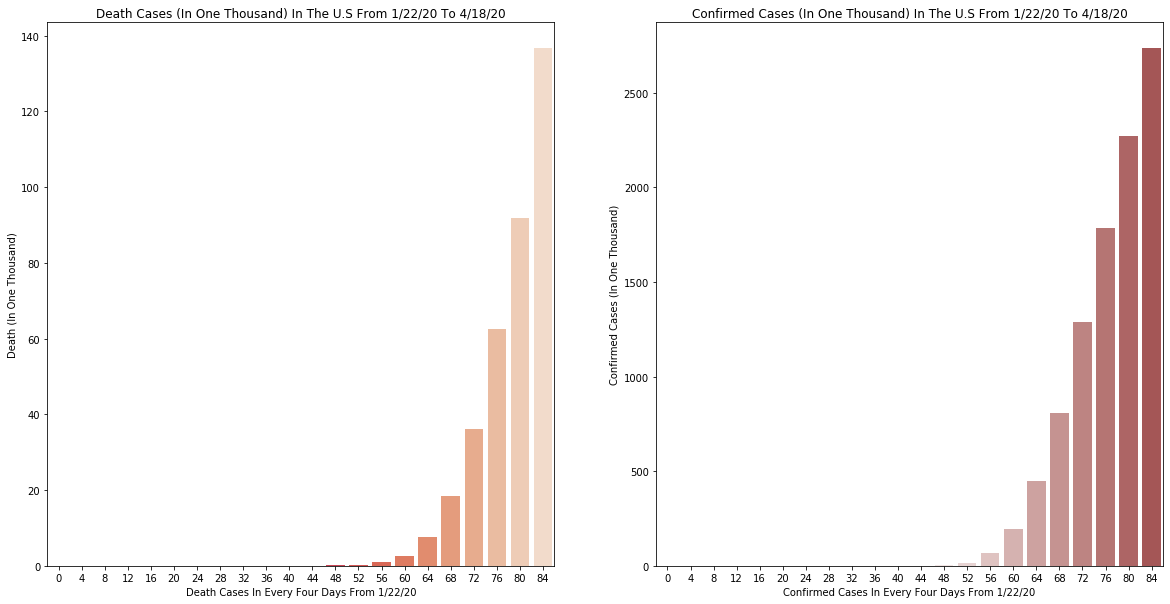

In [41]:
#Make 2 columns bar plot
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(20,10)

confirmed_bar = sns.barplot(y=confirmed_sum['TotalConfirmed']/1000, 
                            x=confirmed_sum.index * 4, ax=axs[1], palette='vlag')
confirmed_bar.set_title('Confirmed Cases (In One Thousand) In The U.S From 1/22/20 To 4/18/20')
confirmed_bar.set_ylabel('Confirmed Cases (In One Thousand)')
confirmed_bar.set_xlabel('Confirmed Cases In Every Four Days From 1/22/20')

death_bar = sns.barplot(y=death_sum['TotalDeath']/1000, 
                        x=death_sum.index * 4, ax=axs[0], palette='rocket')
death_bar.set_title('Death Cases (In One Thousand) In The U.S From 1/22/20 To 4/18/20')
death_bar.set_ylabel('Death (In One Thousand)')
death_bar.set_xlabel('Death Cases In Every Four Days From 1/22/20')

-------

<a id='3b'></a>
### 3b. Comparing The Total Of Confirmed Cases vs Tested-Cases In The U.S:

In [42]:
states_data.sort_values(by=['Confirmed', 'Deaths'], ascending=False).head(10)

State_Abbrev Province_State Country_Region          Last_Update      Lat  \
36           NY       New York             US  2020-04-18 22:32:47  42.1657   
34           NJ     New Jersey             US  2020-04-18 22:32:47  40.2989   
25           MA  Massachusetts             US  2020-04-18 22:32:47  42.2302   
43           PA   Pennsylvania             US  2020-04-18 22:32:47  40.5908   
26           MI       Michigan             US  2020-04-18 22:32:47  43.3266   
5            CA     California             US  2020-04-18 22:32:47  36.1162   
17           IL       Illinois             US  2020-04-18 22:32:47  40.3495   
11           FL        Florida             US  2020-04-18 22:32:47  27.7663   
22           LA      Louisiana             US  2020-04-18 22:32:47  31.1695   
49           TX          Texas             US  2020-04-18 22:32:47  31.0545   

       Long_  Confirmed  Deaths  Recovered    Active  FIPS  Incident_Rate  \
36  -74.9481     241712   17671    23887.0  224041.0  36.0    1433.554603   
34  -74.5210      81420    4070        0.0   77350.0  34.0     916.665822   
25  -71.5301      36372    1404        0.0   34968.0  25.0     529.912707   
43  -77.2098      31652    1042        0.0   30610.0  42.0     251.455869   
26  -84.5361      30791    2308     3237.0   28483.0  26.0     386.469173   
5  -119.6816      30491    1140        0.0   29351.0   6.0      77.766063   
17  -88.9861      29160    1259        0.0   27901.0  17.0     248.473604   
11  -81.6868      25492     748        0.0   24744.0  12.0     120.060628   
22  -91.8678      23580    1267        0.0   22313.0  22.0     512.913545   
49  -97.5635      18704     476     4806.0   18228.0  48.0      81.376364   

    People_Tested  People_Hospitalized  Mortality_Rate       UID ISO3  \
36       596532.0              54339.0        7.310767  84000036  USA   
34       162536.0               7718.0        4.998772  84000034  USA   
25       156806.0               3729.0        3.860112  84000025  USA   
43       153965.0               2613.0        3.292051  84000042  USA   
26        99727.0               3634.0        7.495697  84000026  USA   
5        251614.0               4892.0        3.738808  84000006  USA   
17       137404.0               4340.0        4.317558  84000017  USA   
11       246527.0               3842.0        2.934254  84000012  USA   
22       137999.0               1761.0        5.373198  84000022  USA   
49       176239.0               1321.0        2.544910  84000048  USA   

    Testing_Rate  Hospitalization_Rate  
36   3537.934378             22.480886  
34   1829.909065              9.479243  
25   2284.545582             10.252392  
43   1223.158186              8.255403  
26   1251.710281             11.802150  
5     641.731334             16.044079  
17   1170.825347             14.883402  
11   1161.077449             15.071395  
22   3001.762352              7.468193  
49    766.771225              7.062660

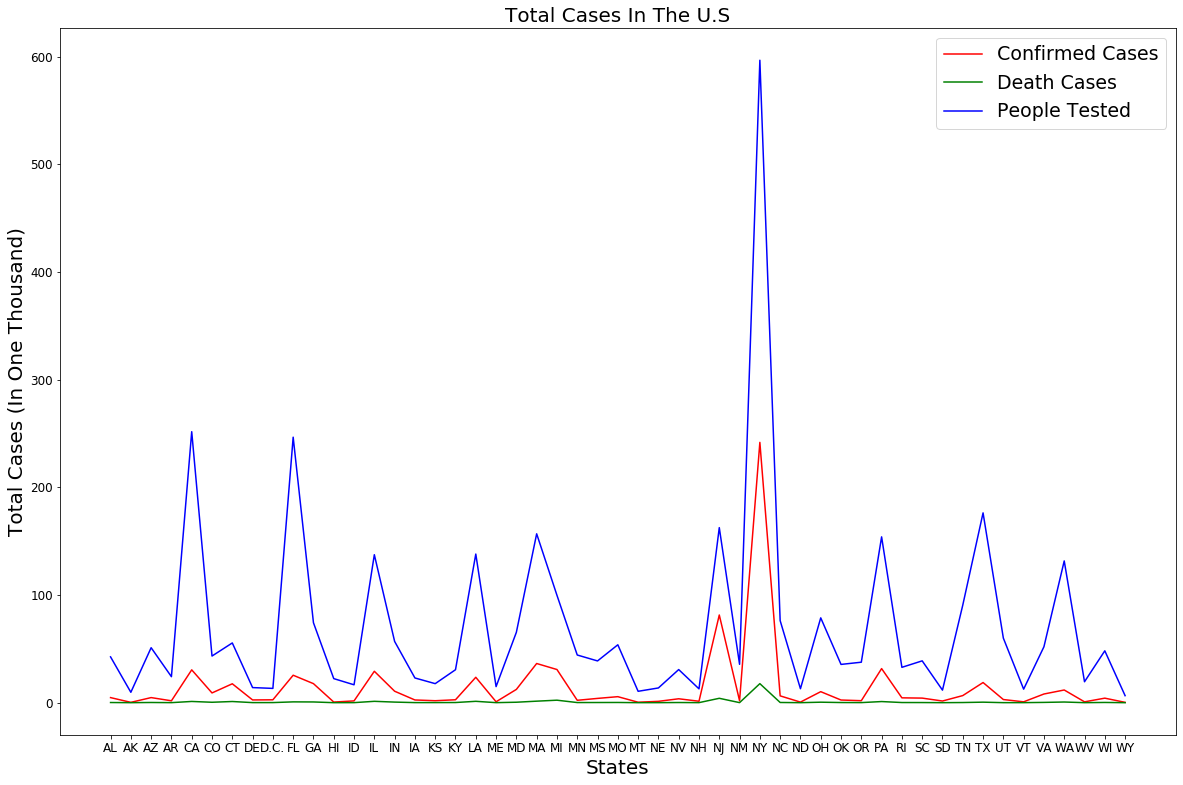

In [43]:
plt.figure(figsize=(20,13))
plt.plot(states_data['State_Abbrev'], states_data['Confirmed']/1000, color='r')
plt.plot(states_data['State_Abbrev'], states_data['Deaths']/1000, color='g')
plt.plot(states_data['State_Abbrev'], states_data['People_Tested']/1000, color='b')
plt.title('Total Cases In The U.S', fontsize=20)
plt.xlabel('States', fontsize=20)
plt.ylabel('Total Cases (In One Thousand)', fontsize=20)
plt.legend(['Confirmed Cases', 'Death Cases', 'People Tested'], fontsize=19)
plt.tick_params(labelsize=12);

-------

<a id='3c'></a>
### 3c. Geographical Comparisons of Mortality and Hospitalization Rates in the U.S:

### Geographical Mortality Rates in the U.S:

In [44]:
#‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’.
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

m = folium.Map(location=[37, -100], zoom_start=4)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=states_data,
    columns=['State_Abbrev', 'Mortality_Rate'],
    key_on='feature.id',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Mortality Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m.save('#covid19_mortality_Rate.html')
m

### Geographical Hospitalization Rates in the U.S:

In [45]:
#‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’.
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

m = folium.Map(location=[37, -100], zoom_start=4)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=states_data,
    columns=['State_Abbrev', 'Hospitalization_Rate'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Hospitalization Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m.save('#covid19_hospitalization_Rate.html')
m

-------

<a id='3d'></a>
### 3d. Correlations between features in all states in the U.S:

Text(0.5, 1, 'Correlations between states features')

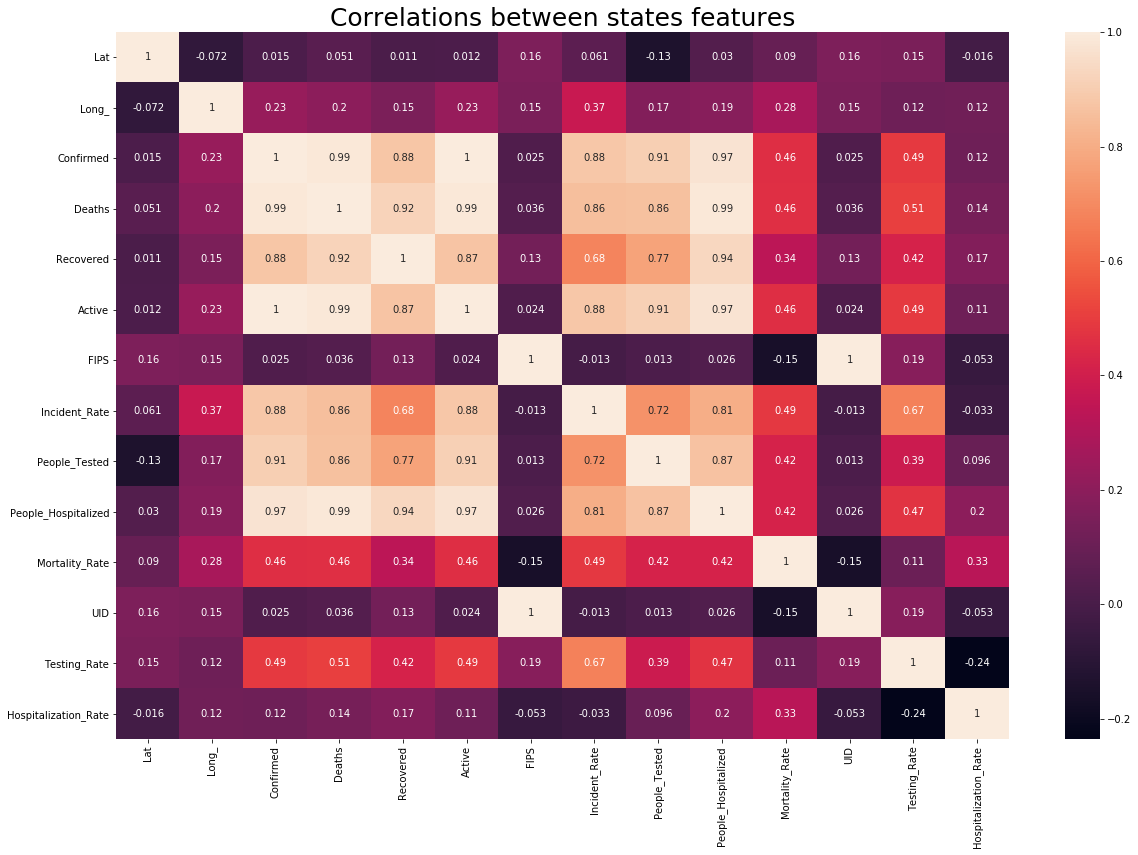

In [48]:
#Only takes the head 60 words because it took too long to load more and get better values.
plt.figure(figsize=(20,13))
states_heat = sns.heatmap(states_data.corr(), annot=True)
states_heat.set_title("Correlations between states features", fontsize=25)

-------

<a id='3e'></a>
### 3e. Coronavirus Growth in New York:

### From confirmed_data dataframe:

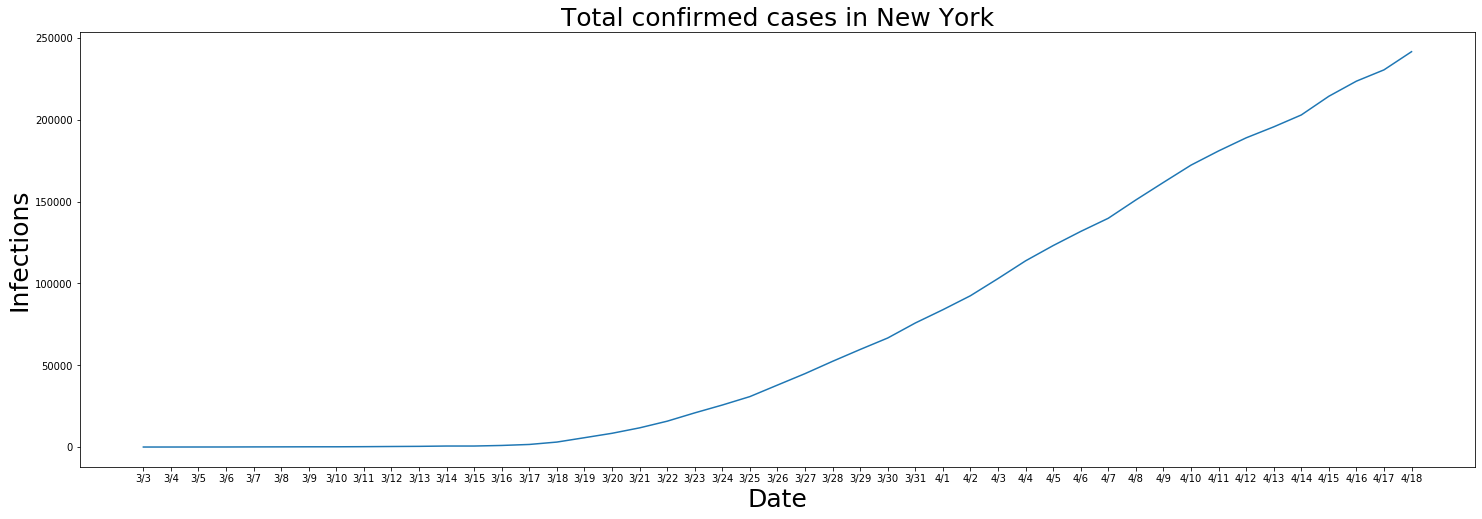

In [49]:
NY_confirmed = confirmed_data[confirmed_data['Province_State'] == 'New York']
NY_confirmed = NY_confirmed.drop(columns=['UID', 'iso2', 'iso3', 'code3', 
                        'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
NY_confirmed_count = NY_confirmed.iloc[:, 41:]
Ny_conf = NY_confirmed_count.sum()
#Make it easier to read for all the x labels
Ny_conf.index = NY_confirmed_count.sum().index = [a[:4] if a[3] != '/' else a[:3] for a in NY_confirmed_count.sum().index]
plt.figure(figsize=(25,8))
#Hide output by putting ';' at the end.
plt.xlabel('Date', fontsize=25)
plt.ylabel('Infections', fontsize=25)
plt.title('Total confirmed cases in New York', fontsize=25)
plt.plot(Ny_conf);

In [50]:
NY_confirmed.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
1833        0        0        0        0        0        0        0        0   
1834        0        0        0        0        0        0        0        0   
1835        0        0        0        0        0        0        0        0   
1836        0        0        0        0        0        0        0        0   
1837        0        0        0        0        0        0        0        0   

      1/30/20  1/31/20  ...  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  \
1833        0        0  ...     379      426      446      478      499   
1834        0        0  ...      22       26       26       26       26   
1835        0        0  ...       0        0        0        0        0   
1836        0        0  ...     105      112      117      126      133   
1837        0        0  ...      17       18       19       28       28   

      4/14/20  4/15/20  4/16/20  4/17/20  4/18/20  
1833      535      548      581      619      648  
1834       28       28       28       29       30  
1835        0        0        0        0        0  
1836      146      153      167      178      186  
1837       32       32       32       34       34  

[5 rows x 88 columns]

<br/><br/><br/>
<a id='IV'></a>

## IV. Method and Experiments:

<a id='Exp1'></a>
### Experiment 1: Linear Regression using Exponential Growth to predict the growth in the future:

In the process of trying visualize all possible data to predict the future of the pandemic, we figured a simple Linear Regression Model that can precisely predict the cases in the future. This model will use logarithms transformation and the given SM package to predict the pandemic growth in the future. Since a linear regression is not suitable for extrapolating exponential trends, using logarithms will allow our algorithm to better interpret and process the data.

+ We have the formular for Exponential Growth: x(t) = x0 * b^t
+ We need it to have the form y = a*x + b to perform Linear Regression Model. Thus we take the log of the above formula:
logx(t) = log(a)*t + log(x0)

+ We then find the initial value (x0) and the growth factor (a) using known libabry, specifically, the statsmodels.api

In [51]:
import statsmodels.api as sm

confirmed_df['logConfirmed'] = np.log(confirmed_df.TotalConfirmed)
confirmed_df['Time'] = [i for i in range(confirmed_df.shape[0])]
confirmed_df

TotalConfirmed  logConfirmed  Time
1/22/20               1      0.000000     0
1/23/20               1      0.000000     1
1/24/20               2      0.693147     2
1/25/20               2      0.693147     3
1/26/20               5      1.609438     4
...                 ...           ...   ...
4/14/20          607670     13.317387    83
4/15/20          636350     13.363504    84
4/16/20          667801     13.411746    85
4/17/20          699706     13.458416    86
4/18/20          732197     13.503805    87

[88 rows x 3 columns]

In [52]:
X = confirmed_df.Time
X = sm.add_constant(X)
y = confirmed_df.logConfirmed

model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           logConfirmed   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1194.
Date:                Fri, 15 May 2020   Prob (F-statistic):           3.27e-52
Time:                        16:28:07   Log-Likelihood:                -139.69
No. Observations:                  88   AIC:                             283.4
Df Residuals:                      86   BIC:                             288.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9819      0.253     -3.880      0.0

/srv/conda/envs/data100/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Now we need to convert this into the equation: 
    $$y = ax + b $$
    
where: 
- y is the number of cases
- x is the time (in number given in our data frame, from 0 to 88)
- a is the time value (calculated using log)
- b is the initial constant value

As we saw in the summary table above, our initial value for const is -0.9819, our time is 0.1736. 
Thus, 

$$y = 0.1736x + -0.9819 \text{ <=> } log\times x(t) = log(a)\times t + log(x_0)$$


We have 
$$log(x_0) = -0.9819 \text{ => } x_0 = e^{-0.9819} = 0.375$$
Also, 
$$log(a) = 0.1736 \text{ <=> } a = e^{0.1736} = 1.19$$
Thus, 
$$x(t) = x0 \times a^t = 0.375 \times 1.19^t$$

In [53]:
np.exp(-0.9819)

0.3745986847712759

In [54]:
np.exp(0.1736)

1.189579638785787

In [55]:
def linear_predictions(t):
    return np.exp(-0.9819) * np.exp(0.1736) ** t

In [56]:
confirmed_df['Predictions'] = confirmed_df.Time.apply(linear_predictions)
confirmed_df.head()

TotalConfirmed  logConfirmed  Time  Predictions
1/22/20               1      0.000000     0     0.374599
1/23/20               1      0.000000     1     0.445615
1/24/20               2      0.693147     2     0.530094
1/25/20               2      0.693147     3     0.630590
1/26/20               5      1.609438     4     0.750137

In [57]:
def rmse(predicted, actual):
    """
    Calculates RMSE from actual and predicted values
    Input:
      predicted (1D array): vector of predicted/fitted values
      actual (1D array): vector of actual values
    Output:
      a float, the root-mean square error
    """
    return np.sqrt(np.mean((actual - predicted)**2))

training_error = rmse(confirmed_df.TotalConfirmed, confirmed_df.Predictions)
print("Training RMSE: {}".format(training_error))

Training RMSE: 112143.14011590491


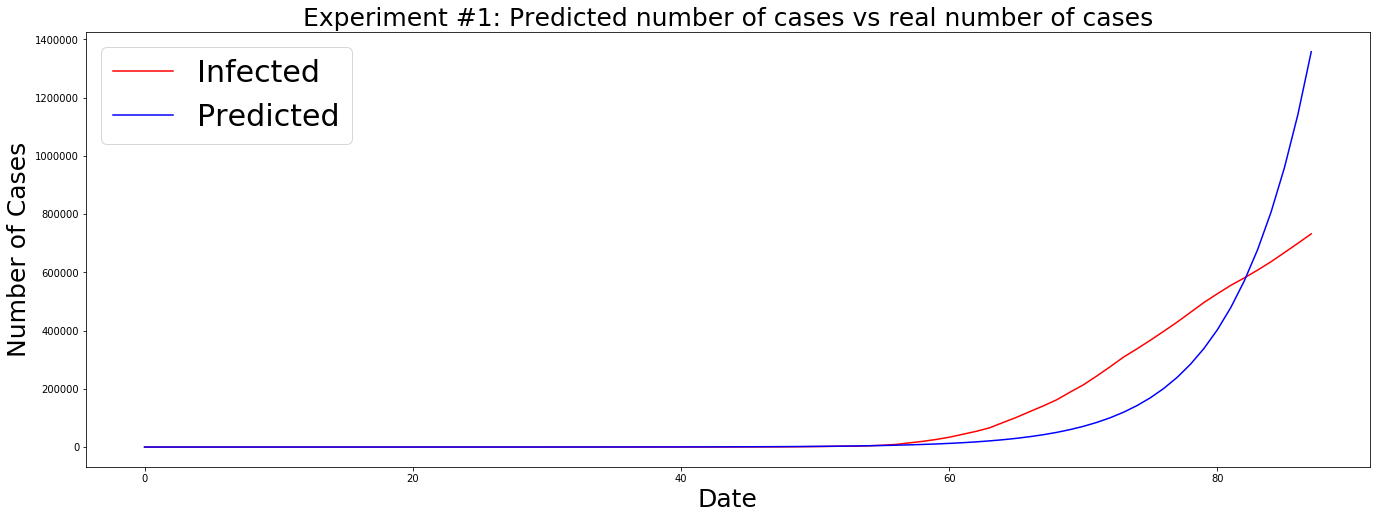

In [58]:
plt.figure(figsize=(23,8))
plt.plot(confirmed_df.Time, confirmed_df.TotalConfirmed, 'red')
plt.plot(confirmed_df.Time, confirmed_df.Predictions, 'blue')
plt.title('Experiment #1: Predicted number of cases vs real number of cases', fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Number of Cases', fontsize=25)
plt.legend(['Infected', 'Predicted'],fontsize=30)

**As we can see, the Exponential Growth will only fit the epidemic at some points in the timeframe given. The reasons for this might be:**

+ At some point, the infected people will be at its peak and thus the Linear Model does not accurately predict the result. For example, on 3/10/20, the number of people infected is only half the number of people predected. On contrary, at the last day in the above data frame (3/21/20), we have 25725 infected, but can only predict half the number based on our formula.


+ At some other point, healed people will not spread the virus anymore and when (almost) everyone is or has been infected, the growth will stop. At another point, infected people who did not know they're infected will affect their surrounding people.

**Citation:** Ideas taken from lectures note and <a href="https://towardsdatascience.com/can-you-predict-how-the-coronavirus-spreads-43b3631a1b1b ">towards data science</a>.

-------

<a id='Exp2'></a>
### Experiment 2: Predicting the future death of the U.S using Linear Regression Model with high accuracy:

In [59]:
resultConfirmedAndDeath = confirmed_df.drop(columns=['Predictions', 'logConfirmed'])
resultConfirmedAndDeath['TotalDeath'] = death_df.TotalDeath
resultConfirmedAndDeath['Confirmed_diff'] = resultConfirmedAndDeath['TotalConfirmed'].diff()
resultConfirmedAndDeath['Deaths_diff'] = resultConfirmedAndDeath['TotalDeath'].diff()
resultConfirmedAndDeath['TotalCombined'] = resultConfirmedAndDeath['Confirmed_diff'] + resultConfirmedAndDeath['Deaths_diff']
resultConfirmedAndDeath.head(100)

TotalConfirmed  Time  TotalDeath  Confirmed_diff  Deaths_diff  \
1/22/20               1     0           0             NaN          NaN   
1/23/20               1     1           0             0.0          0.0   
1/24/20               2     2           0             1.0          0.0   
1/25/20               2     3           0             0.0          0.0   
1/26/20               5     4           0             3.0          0.0   
...                 ...   ...         ...             ...          ...   
4/14/20          607670    83       25831         27051.0       2303.0   
4/15/20          636350    84       28325         28680.0       2494.0   
4/16/20          667801    85       32916         31451.0       4591.0   
4/17/20          699706    86       36773         31905.0       3857.0   
4/18/20          732197    87       38664         32491.0       1891.0   

         TotalCombined  
1/22/20            NaN  
1/23/20            0.0  
1/24/20            1.0  
1/25/20            0.0  
1/26/20            3.0  
...                ...  
4/14/20        29354.0  
4/15/20        31174.0  
4/16/20        36042.0  
4/17/20        35762.0  
4/18/20        34382.0  

[88 rows x 6 columns]

In [60]:
resultConfirmedAndDeath.index = [a+'20' for a in resultConfirmedAndDeath.index]

In [61]:
dates = resultConfirmedAndDeath.index
date_format = [pd.to_datetime(d) for d in dates]
date_format[:5]

[Timestamp('2020-01-22 00:00:00'),
 Timestamp('2020-01-23 00:00:00'),
 Timestamp('2020-01-24 00:00:00'),
 Timestamp('2020-01-25 00:00:00'),
 Timestamp('2020-01-26 00:00:00')]

In [62]:
from sklearn import linear_model
X = date_format
y = resultConfirmedAndDeath['TotalCombined'].tolist()[1:]
# date format is not suitable for modeling, let's transform the date into incrementals number 
starting_date = 45
day_numbers = []
for i in range(1, 88):
    day_numbers.append([i])
X = day_numbers

# # let's train our model only with data after the peak
X = X[starting_date:]
y = y[starting_date:]
# Instantiate Linear Regression
linear_regr = linear_model.LinearRegression()
# Train the model using the training sets
linear_regr.fit(X, y)
print ("Linear Regression Model Score: %s" % (linear_regr.score(X, y)))

Linear Regression Model Score: 0.9013947368430194


As we can see, the Linear Regression Model Score was very high.

**Predicting Future Trends:**

In [63]:
y_pred = linear_regr.predict(X)
error = rmse(y_pred, y)
error

4288.5285265917555

Furthermore, the RMSE improves significantly, from ~112K in our first experiment to only ~4K in this second experiment.

In [65]:
X_test = []
future_days = 150
for i in range(starting_date, starting_date + future_days):
    X_test.append([i])
y_pred_linear = linear_regr.predict(X_test)

In [66]:
y_pred_max = []
y_pred_min = []
for i in range(0, len(y_pred_linear)):
    y_pred_max.append(y_pred_linear[i] + error)
    y_pred_min.append(y_pred_linear[i] - error)

In [67]:
# convert date of the epidemic peak into datetime format
from datetime import datetime, timedelta
date_zero = datetime.strptime(resultConfirmedAndDeath.index[starting_date], '%m/%d/%Y')
# creating x_ticks for making the plot more appealing
date_prev = []
x_ticks = []
step = 7
data_curr = date_zero
x_current = starting_date
n = int(future_days / step)
for i in range(0, n):
    date_prev.append(str(data_curr.day) + "/" + str(data_curr.month))
    x_ticks.append(x_current)
    data_curr = data_curr + timedelta(days=step)
    x_current = x_current + step

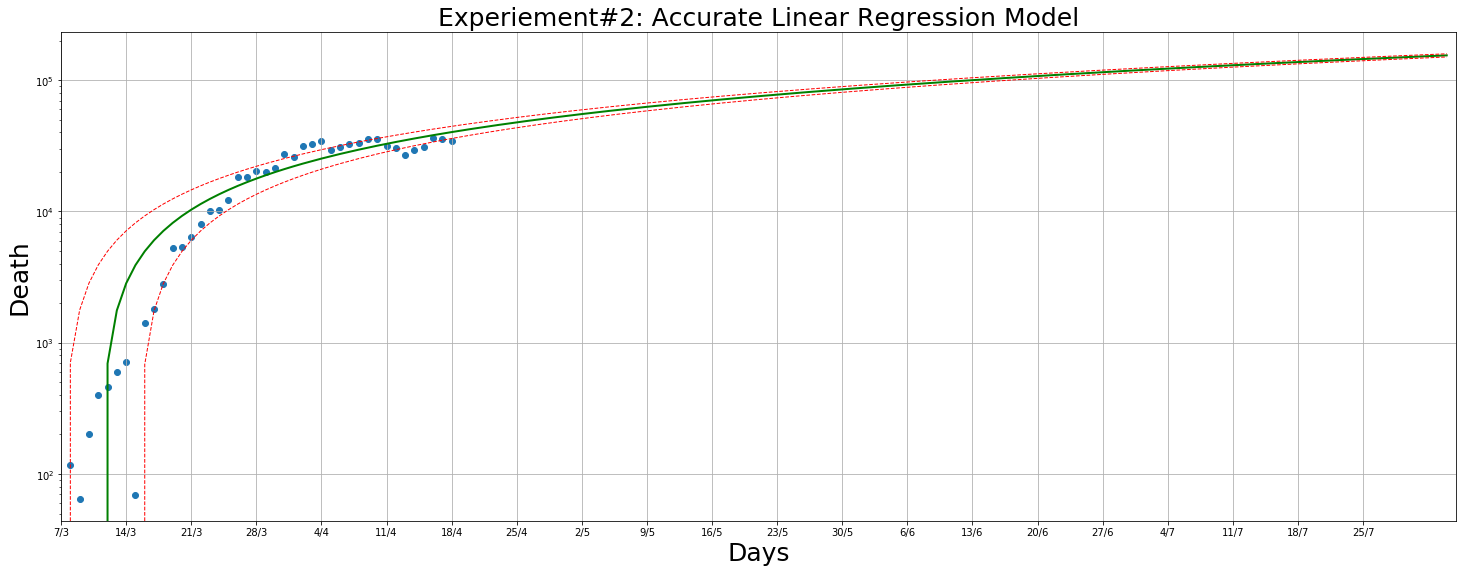

In [68]:
# plot known data
plt.figure(figsize=(25,9))
plt.grid()
plt.scatter(X, y)
# plot linear regression prediction
plt.plot(X_test, y_pred_linear, color='green', linewidth=2)
# plot maximum error
plt.plot(X_test, y_pred_max, color='red', linewidth=1, linestyle='dashed')
#plot minimum error
plt.plot(X_test, y_pred_min, color='red', linewidth=1, linestyle='dashed')
plt.xlabel('Days', fontsize=25)
plt.xlim(starting_date, starting_date + future_days)
plt.xticks(x_ticks, date_prev)
plt.ylabel('Death', fontsize=25)
plt.yscale("log")
plt.savefig("prediction.png")
plt.title("Experiement#2: Accurate Linear Regression Model", fontsize=25)
plt.show()

**We compared this Death Prediction of the U.S with the actualy death of the U.S now (~80K) according to WorldOmeter website, this turns out to be very accurate as we can see from the graph above since 10^5 = 100K people.**

**Citation:** Ideas from HW problems and from <a href="https://towardsdatascience.com/modeling-covid-19-epidemic-with-python-bed21b8f6baf">towards data science</a>

-------

<a id='Exp3'></a>
### Experiment 3: SIR Model

As we are looking to model the spread of the epidemic, we cannot ignore the famous epidemiologic models: SIR.

The SIR model is a compartmental model that segregates a population into three components (compartments):
1. Susceptible (S): Can be infected but currently healthy
2. Infected (I): Already carrying the disease
3. Recovered (R): Have been infected before, cannot be infected again

The 4 Key Parameters $β$,$D$,$γ$,$N$

1. $β$ parameter: the expected number of people an infected person infects in a day.

2. $D$ parameter: the length of the infection period; the length of the period when a person is ill and can infect others.

3. $γ$ parameter: the proportion of infected recovering every day; the rate of recovery ($=1/D$)

4. $N$ parameter: the total population

$Ro$ is the basic reproduction number, in other words: the total number of people an infected person expect to infect. 
The forumula based on the parameters above is: 
$$Ro=β×D$$
$$Ro=β×(1/γ)=β/γ$$

Note: The rate of change represents the number of ADDITIONAL people susceptible/infected/recovered. 

There are multiple interpretations of the SIR model. The differential equations we will use to govern our model are the ones derived in the Piazza Post. Below is a summary of the equations:

The change of number of people susceptible to the disease by the next day:

$$\text{Change in } S(t) = \frac{dS}{dt} =  −β×I(t)×\frac{S(t)}{N}$$

The change of number of people currently infected:

$$\text{Change in } I(t) = \frac{dI}{dt} = β×I(t)×\frac{S(t)}{N}−γ×I(t) $$

The change of number of people who recover:

$$\text{Change in } R(t) = \frac{dR}{dt} = γ×I(t) $$


In [69]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta*I*(S/N)
    dIdt = beta*I*(S/N) - gamma*I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

According to a study published online in Emerging Infectious Diseases(EID) of the CDC, the $Ro$ for COVID-19 is a median of 5.7. <a href="https://wwwnc.cdc.gov/eid/article/26/7/20-0282_article">Source</a>

Regarding how long COVID-19 tends to infect a person until the person recovers ($D$), it varies greatly from person to person. For this model, we will be using the data provided on the CDC website, which suggests 10 days. <a href="https://www.cdc.gov/coronavirus/2019-ncov/hcp/faq.html">Source</a>

With $D = 10$ and $Ro = 5.7$, 
$$β = \frac{Ro}{D} = \frac{5.7}{10} = 0.57 $$

In [70]:
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days) as defined above:
beta = 0.57
gamma = .1

In this SIR model, we will be looking into US. However, we will be looking at the data starting from the last update given in the `states_data`, the date of which is 2020-04-18 

In [71]:
recovered = states_data['Recovered'].sum()
deaths = states_data['Deaths'].sum()
confirmed = states_data['Confirmed'].sum()
active = states_data['Active'].sum()

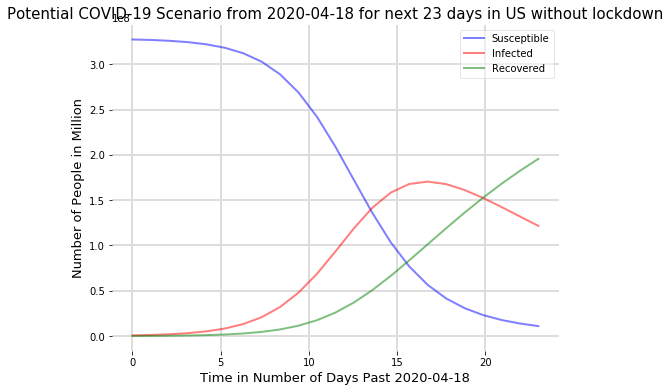

In [72]:
from scipy.integrate import odeint

# N is the total US population
N = 328200000
            
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = confirmed, recovered

# Everyone else, S0, is susceptible to infection initially.
S0 = N-I0-R0

# Initial conditions vector
y0 = S0, I0, R0

# A grid of time points (in days)
t = np.linspace(0, 23, 23)

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w', figsize=(8,6))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time in Number of Days Past 2020-04-18', size=13)
ax.set_ylabel('Number of People in Million', size=13)
ax.grid(b=True, which='major', c='#dddddd', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
ax.set_title('Potential COVID-19 Scenario from 2020-04-18 for next 23 days in US without lockdown', size=15)
plt.show()

-------

#### Further Exploration: 
The graph above displays the potential COVID-19 scenario from 2020-04-18 for the following 23 days till 2020-05-12 in US without lockdown. 
Given that most of US in lockdown during that time period, we wanted observe the data from 2020-04-18 till 2020-05-12. 

*Note: the following dataset is not included in the dataset provided by the staff. It is, however, taken from the same CSSEGISandData Github. 
<a href="https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series">Source</a>*

In [73]:
#Importing the new data
confirmed_new = pd.read_csv("time_series_covid19_confirmed_US_new.csv")
death_new = pd.read_csv("time_series_covid19_deaths_US_new.csv")
recovered_new = pd.read_csv("time_series_covid19_recovered_global.csv")

In [74]:
#With the same procedures above, we are going to perform data cleaning: 
confirmed_new.fillna(0, inplace=True)
death_new.fillna(0, inplace=True)
recovered_new.fillna(0, inplace=True)

#Check if there is any NaN values.
a = confirmed_new.isna().sum().sum() == 0
b = death_new.isna().sum().sum() == 0
c = recovered_new.isna().sum().sum() == 0
print(a & b & c)

#display data (commented out)
# confirmed_new.head()
# death_new.head()
# recovered_new.head()

True


In [75]:
US_confirmed = confirmed_new
US_confirmed = US_confirmed.drop(columns=['UID', 'iso2', 'iso3', 'code3', 
                        'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
US_confirmed_count = US_confirmed.iloc[:, 89:]
US_confirmed_count= US_confirmed_count.sum()

US_death = death_new
US_death = US_death.drop(columns=['UID', 'iso2', 'iso3', 'code3', 
                        'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
US_death_count = US_death.iloc[:, 89:]
US_death_count = US_death_count.sum()

US_recovered = recovered_new
US_recovered = US_recovered.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
US_recovered_count = US_recovered.iloc[:, 89:]
US_recovered_count = US_recovered_count.sum()

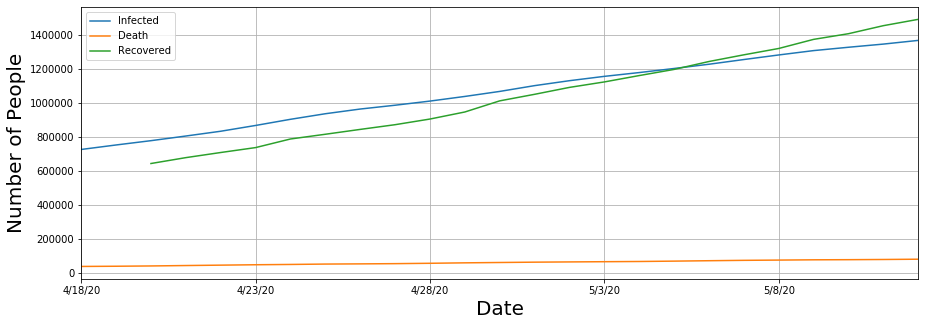

In [76]:
US_time_series = pd.DataFrame()
US_time_series['Infected'] = US_confirmed_count
US_time_series['Death'] = US_death_count
US_time_series['Recovered'] = US_recovered_count
US_time_series.head()
US_time_series.plot(kind='line', figsize=(15,5), grid = True);

plt.xlabel("Date", fontsize=20);
plt.ylabel("Number of People", fontsize=20);

#### Observations:
The SIR model data showed that the number of infected would increase to a little over 1.6 million around May 4th, and decrease afterwards. However, the data plotted based on the historical US trends indicate that the infected increased at a less steeper slope and continued to increase beyond May 4th. Despite so, it fortunately remained below 1.6 million within the given time frame.
The SIR model data further shows that the number of recovered increased up to 2 million by May 12th. 
The number of recovered in historical US trends increased to a little over 1.4 million. The discrepency may be due to the fact that less people were infected than the model predicted.
Thus, we can say that shelter-in-place and lockdown of US has helped prevent the infected case from reaching the predicted potential thus far.

-------